## Inżynieria cech i tworzenie modelu regresji

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dane.csv')
dane = df.drop(columns = 'identyfikator')

In [3]:
from sklearn.model_selection import train_test_split

populacja = dane['populacja_ogolem']
dane.drop(['populacja_ogolem', 'powiat'], axis = 1, inplace = True)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#podział na dane treningowe i testowe
dane_train, dane_test, populacja_train, populacja_test = train_test_split(dane, populacja, test_size = 0.2, random_state = 0)

model1 = LinearRegression()
model1.fit(dane_train, populacja_train)

print("MSE =", mean_squared_error(populacja_test, model1.predict(dane_test)))
print("R2 score =", r2_score(populacja_test, model1.predict(dane_test)))

MSE = 8894581.69925874
R2 score = 0.9991265298914818


Jak można było przypuszczać liczba ludności np z dostępem do kanalizacji jest z zbyt skorelowana z ogólną liczbą ludności (przewidywaną cechą) żeby wyciągnąć jakiekolwiek sensowne wnioski. Dlatego właśnie usuwamy cechy które zawierają w sobie liczbę ludności i tworzymy model korzystający z pozostałych cech.

In [5]:
#odrzucamy następujące kolumny ponieważ oznaczają one praktycznie to samo co chcemy przewidywać
dane.drop(['populacja_produkcyjna', 'wodociagi', 'gaz', 'kanalizacja'], axis = 1, inplace = True)

#podział na dane treningowe i testowe
dane_train, dane_test, populacja_train, populacja_test = train_test_split(dane, populacja, test_size = 0.2, random_state = 0)

model2 = LinearRegression()
model2.fit(dane_train, populacja_train)

print("MSE =", mean_squared_error(populacja_test, model2.predict(dane_test)))
print("R2 score for plain linear regression =", r2_score(populacja_test, model2.predict(dane_test)))

MSE = 371417737.4790971
R2 score for plain linear regression = 0.9635258517566379


Udało się uzyskać wynik mniejszy niż 1.0 po usunięciu zbyt skorelowanych cech. Teraz możemy zająć się polepszaniem tego wyniku w celu otrzymania dokładniejszego modelu.

stadiony                        2.177093
hale_sportowe                   5.195959
sale_gimnastyczne               5.141891
korty_tenisowe                  5.091206
plywalnie                      10.971238
drogi_utwardzone_na_obszar      1.667535
drogi_utwardzone_na_ludnosc     0.661188
drogi_gruntowe_na_obszar        1.660912
drogi_gruntowe_na_ludnosc       3.048154
szkoly_zawodowe                -1.859818
sciezki_rowerowe_na_obszar      2.755309
sciezki_rowerowe_na_ludnosc     1.605798
przystanki_zbiorkom             4.233128
licea                          10.629953
wynagrodzenia                   2.610878
odbior_odpadow                  1.849032
koszty_odpadow                  2.337063
szkoly_podstawowe               5.887423
dtype: float64


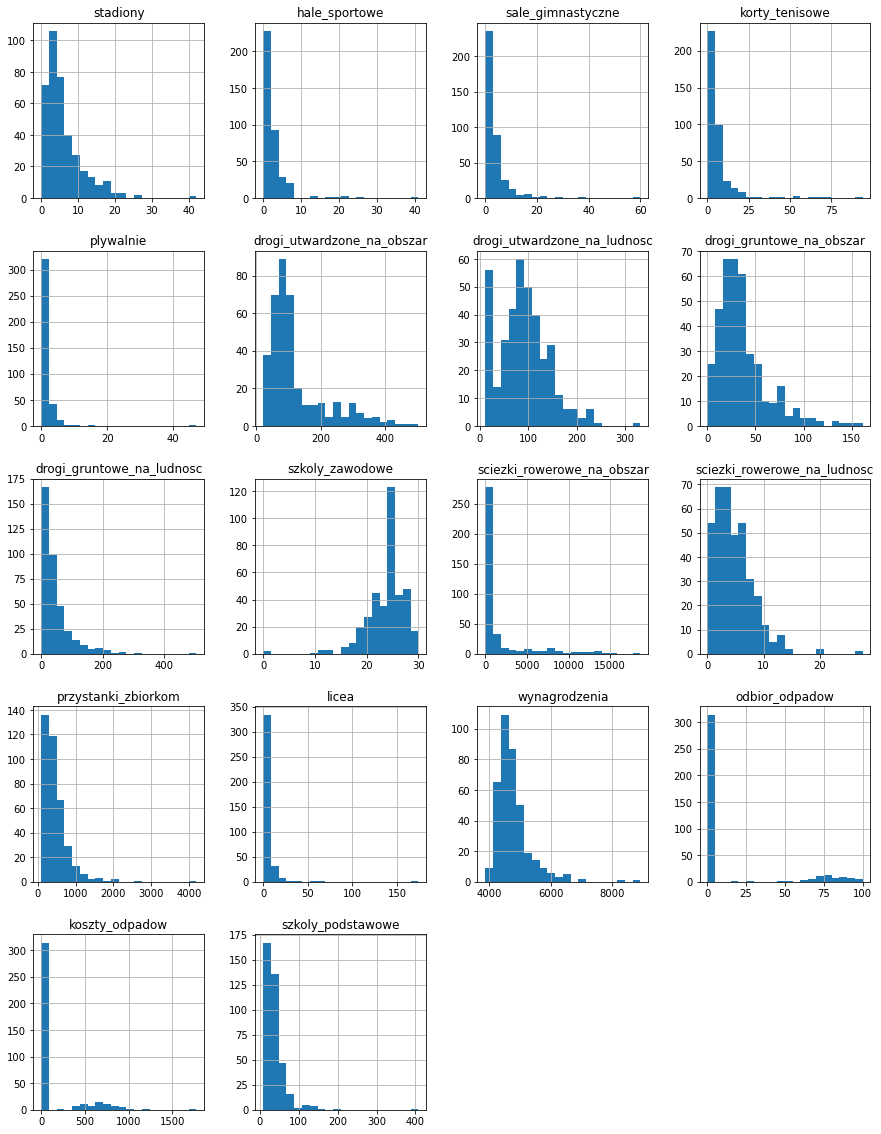

In [6]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dane.hist(ax = ax, bins=20)
print(dane.skew())

stadiony                        2.177093
hale_sportowe                   5.195959
sale_gimnastyczne               5.141891
korty_tenisowe                  5.091206
plywalnie                      10.971238
drogi_utwardzone_na_obszar      1.667535
drogi_utwardzone_na_ludnosc     0.661188
drogi_gruntowe_na_obszar        1.660912
drogi_gruntowe_na_ludnosc       3.048154
szkoly_zawodowe                -1.859818
sciezki_rowerowe_na_obszar      2.755309
sciezki_rowerowe_na_ludnosc     1.605798
przystanki_zbiorkom             4.233128
licea                          10.629953
wynagrodzenia                   2.610878
odbior_odpadow                  1.849032
koszty_odpadow                  2.337063
szkoly_podstawowe               5.887423
log_licea                       1.156949
log_plywalnie                   0.833077
log_szkoly_podstawowe           0.608497
log_przystanki_zbiorkom         0.367915
log_hale_sportowe               0.318653
log_sale_gimnastyczne           0.619592
log_korty_teniso

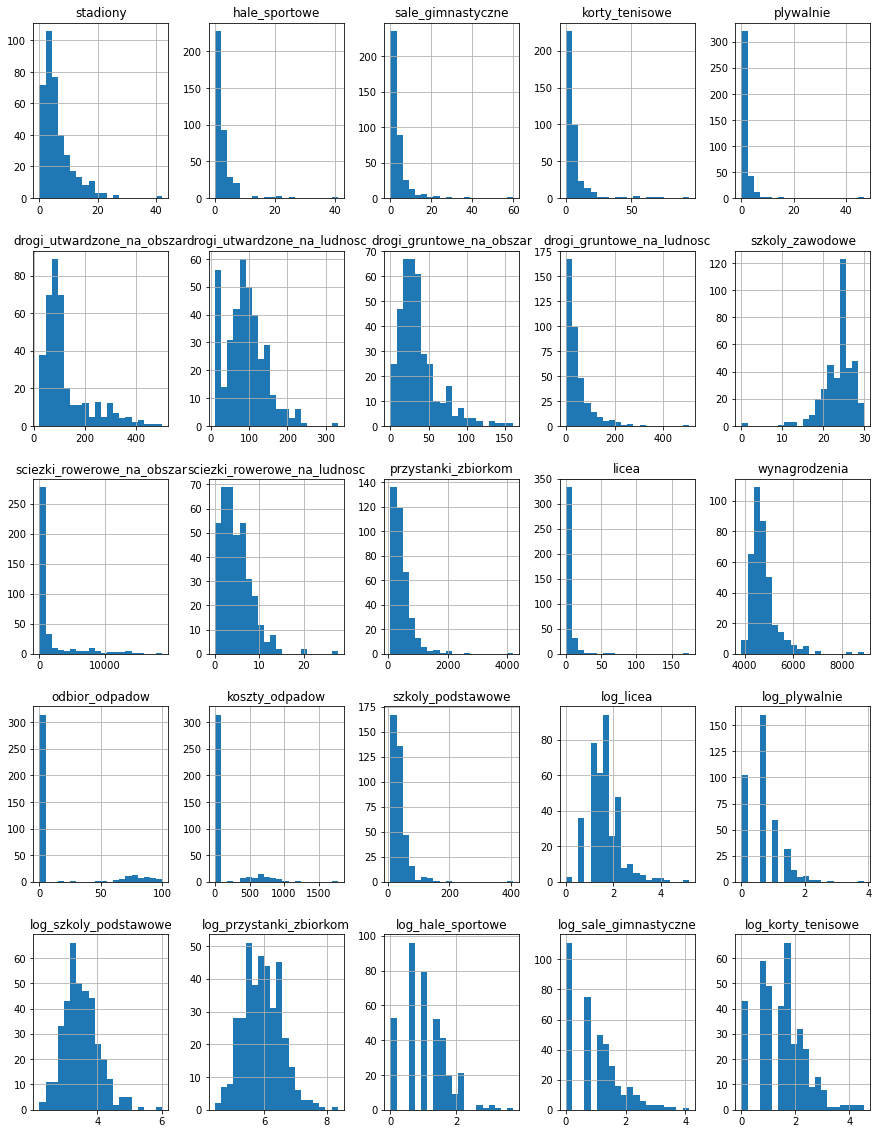

In [7]:
from math import log, sqrt

#dodaję logi wszystkich cech które są zbyt prawoskośne

dane['log_licea'] = dane['licea'].apply(lambda x: log(x + 1))
dane['log_plywalnie'] = dane['plywalnie'].apply(lambda x: log(x + 1))
dane['log_szkoly_podstawowe'] = dane['szkoly_podstawowe'].apply(lambda x: log(x + 1))
dane['log_przystanki_zbiorkom'] = dane['przystanki_zbiorkom'].apply(lambda x: log(x + 1))
dane['log_hale_sportowe'] = dane['hale_sportowe'].apply(lambda x: log(x + 1))
dane['log_sale_gimnastyczne'] = dane['sale_gimnastyczne'].apply(lambda x: log(x + 1))
dane['log_korty_tenisowe'] = dane['korty_tenisowe'].apply(lambda x: log(x + 1))
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dane.hist(ax = ax, bins=20)
print(dane.skew())

<AxesSubplot:>

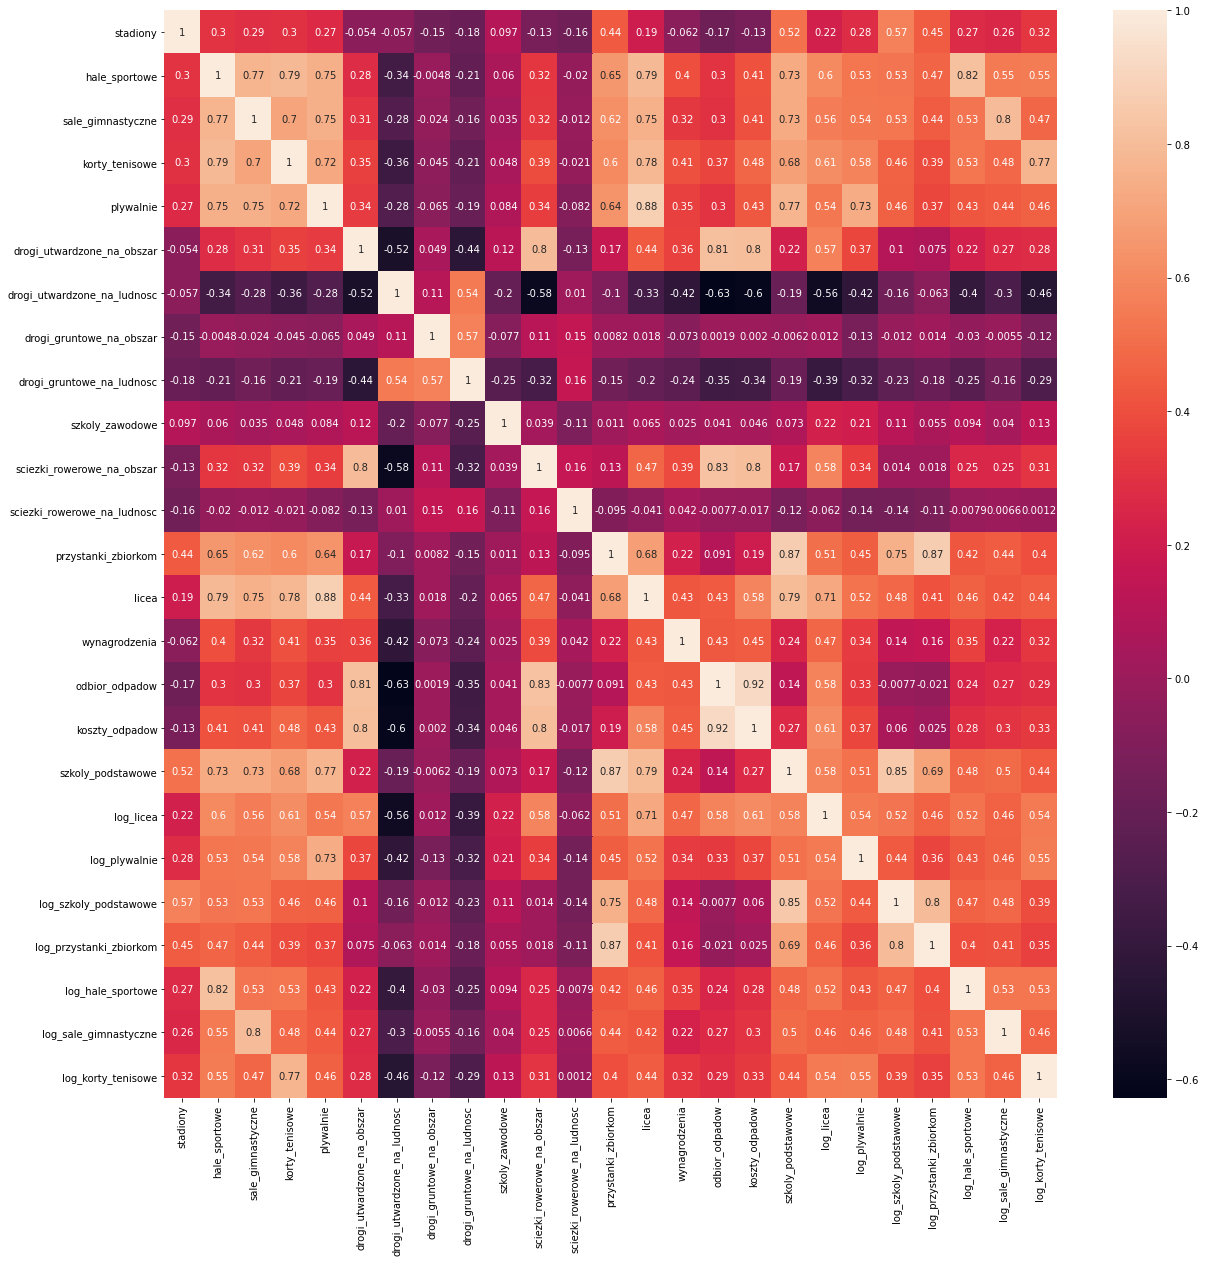

In [8]:
plt.subplots(figsize=(20, 20))
sns.heatmap(dane.corr(), annot = dane.corr())

In [9]:
#podział na dane treningowe i testowe
dane_train, dane_test, populacja_train, populacja_test = train_test_split(dane, populacja, test_size = 0.2, random_state = 0)

model3 = LinearRegression()
model3.fit(dane_train, populacja_train)

print("MSE =", mean_squared_error(populacja_test, model3.predict(dane_test)))
print("R2 score for linear regression with added features =", r2_score(populacja_test, model3.predict(dane_test)))

MSE = 313939564.4602113
R2 score for linear regression with added features = 0.9691703517142266


Wzrost *Explain variance score* świadczy o **poprawieniu** się predykcji po dodaniu cech.

Spróbujmy teraz zastosować **regresję wieloraką z pseudoinwerjsą**, być może uzyskamy dla niej lepszy wynik predykcji.

In [10]:
#podział na dane treningowe i testowe
dane_train, dane_test, populacja_train, populacja_test = train_test_split(dane, populacja, test_size = 0.2, random_state = 0)

#należy dodać kolumnę jedynek aby umożliwić dodanie wyrazu wolnego, niezależnego od żadnej z cech
dane_train['ones'] = np.ones((dane_train.shape[0], 1))
dane_test['ones'] = np.ones((dane_test.shape[0], 1))

#liczymy pseudoinwersję
pinw = np.linalg.pinv(dane_train)

#wyznaczamy współczynniki modelu
wsp = np.dot(pinw, populacja_train)

def predict_output(w, x):
    result = []
    for idx, i in x.iterrows():
        tmp = 0
        for val, coef in zip(i, w):
            tmp += val * coef
        result.append(tmp)
    return result

#liczymy błąd dla regresji wielorakiej

print("MSE =", mean_squared_error(populacja_test, predict_output(wsp, dane_test)))
print("R2 score for multiple regression =", r2_score(populacja_test, predict_output(wsp, dane_test)))

MSE = 313939564.46022326
R2 score for multiple regression = 0.9691703517142254


Jak widać *error* jest praktycznie identyczny co w przypadku modelu regresji liniowej, więc zostajemy przy tym pierwszym, ponieważ jest mniej złożony.

Spróbujmy teraz zastosować metodę **Ridge regression** w celu polepszenia predykcji.

In [11]:
from sklearn.linear_model import Ridge

#podział na dane treningowe i testowe
dane_train, dane_test, populacja_train, populacja_test = train_test_split(dane, populacja, test_size = 0.2, random_state = 0)

#po ręcznym sprawdzeniu wielu wartości współczynnika alpha, okazało się że najlepszy wynik otrzymujemy dla 0.825 
clf = Ridge(alpha = 0.825, fit_intercept = False)
clf.fit(dane_train, populacja_train)
wsp = list(clf.coef_)

print("MSE =", mean_squared_error(populacja_test, predict_output(wsp, dane_test)))
print("R2 score for ridge regression =", r2_score(populacja_test, predict_output(wsp, dane_test)))

MSE = 305296648.2864595
R2 score for ridge regression = 0.9700191076404137


Jest to jak do tej pory najlepszy z uzyskanych wyników.
Zastosujmy teraz metodę **LASSO** i porównajmy wyniki.

In [12]:
from sklearn import linear_model  # using scikit-learn

#podział na dane treningowe i testowe
dane_train, dane_test, populacja_train, populacja_test = train_test_split(dane, populacja, test_size = 0.2, random_state = 0)

lasso = linear_model.Lasso(alpha = 10, normalize = True) # set parameters
lasso.fit(dane_train, populacja_train) # learn weights

#wylistowanie pominiętych cech
for w, feat in zip(lasso.coef_, dane_train.columns):
    if w == 0.0:
        print(feat + " nie zostało wzięte pod uwagę")

print("MSE =", mean_squared_error(populacja_test, lasso.predict(dane_test)))
print("R2 score for LASSO regression =", r2_score(populacja_test, lasso.predict(dane_test)))

szkoly_zawodowe nie zostało wzięte pod uwagę
sciezki_rowerowe_na_ludnosc nie zostało wzięte pod uwagę
log_plywalnie nie zostało wzięte pod uwagę
log_przystanki_zbiorkom nie zostało wzięte pod uwagę
MSE = 305099474.5197683
R2 score for LASSO regression = 0.9700384705961109


Po sprawdzeniu wielu parametrów alpha, najlepszym okazał się *alpha = 10* z normalizacją cech.

Jest to jak na razie najlepszy wynik i jak widać z komunikatu na górze, pewne cechy nie zostały wzięte pod uwagę - ich współczynniki sie wyzerowały.

Stwierdziliśmy, że dane treningowe składające się z 300 powiatów nie są wystarczającą ilością do przeprowadzenia walidacji krzyżowej, właśnie z tego powodu dobory współczynników alpha w Lasso i Ridge regression przeprowadziliśmy ręcznie.

Zestawienie **MSE** i **R2** dla wszstkich opracowanych modeli:

Regresja liniowa przed dodaniem cech<br>
MSE = 371417737.4790971<br>
R2 = 0.9635258517566379<br>
Regresja liniowa po dodaniu chech<br>
MSE = 313939564.4602113<br>
R2 = 0.9691703517142266<br>
*Wszystkie kolejne regresje zawierają cechy dodane w poprzednim punkcie ponieważ poprawiły one wynik w zwykłej regresji.<br>*
Regresja wieloraka z pseudoinwersją<br>
MSE = 313939564.4602233<br>
R2 = 0.9691703517142254<br>
Regresja grzbietowa (Ridge)<br>
MSE = 305296648.2864595<br>
R2 = 0.9700191076404137<br>
**Regresja Lasso<br>
MSE = 305099474.5197683<br>
R2 = 0.9700384705961109<br>**
Regresja Lasso najlepiej sprawdza się dla naszego zbioru danych więc do wyciągnięcia wniosków posłużymy się wynikami z otrzymanymi z tego właśnie modelu.

## Wnioski

Działania związane z tworzeniem modelu regresyjnego potwierdziły hipotezę postawioną w poprzedniej części raportu mówiącą, że populacja powiatu jest silnie powiązana z takimi typami infrastruktury jak infrastruktura komunalna (wodociągi, gazociągi, kanalizacja) i infrastruktura społeczna (placówki oświatowe, obiekty sportowe oprócz stadionów), natomiast nie jest powiązana z infrastrukturą drogową. Utworzony model regresyjny wykorzystaliśmy do obliczenia przewidywanej wartości populacji w powiecie na podstawie podanych wartości charakteryzujących infrastrukturę w danym powiecie dla każdego z 380 powiatów, a następnie porównaliśmy wyniki z faktycznymi wartościami populacji.

Na podstawie różnicy między przewidywaną i faktyczną wartością populacji utworzyliśmy kartogram obrazujący stan infrastruktury komunalnej i społecznej w stosunku do populacji powiatu. Wartości kartogramu stanowią różnicę między wartością przewidywaną i faktyczną wyrażoną jako procent populacji całego powiatu. Oznacza to, że w przypadku wartości dodatnich infrastruktura jest lepiej rozbudowana w stosunku do populacji danego powiatu w porównaniu do średniego dostępu do infrastruktury w kraju. Z kolei dla wartości ujemnych infrastruktura w danym powiecie jest niedostateczna w stosunku do populacji danego powiatu.

W przypadku Sopotu obliczany w ten sposób wskaźnik osiągnął wartość ponad 144%, co świadczy o stosunkowo mocno rozbudowanej infrastrukturze i dostępie do niej w stosunku do populacji tego małego miasta (35286 mieszkańców), z kolei powiat sejneński osiągnął wartość wskaźnika około -77% przy populacji 20270 mieszkańców, co oznacza że infrastruktura i dostep do niej w tym powiecie jest słabo rozwinięta w stosunku do populacji powiatu.


In [13]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.loc[df['powiat'] == 'Powiat m.Sopot']

,identyfikator,powiat,populacja_ogolem,populacja_produkcyjna,stadiony,hale_sportowe,sale_gimnastyczne,korty_tenisowe,plywalnie,wodociagi,drogi_utwardzone_na_obszar,drogi_utwardzone_na_ludnosc,drogi_gruntowe_na_obszar,drogi_gruntowe_na_ludnosc,gaz,szkoly_zawodowe,sciezki_rowerowe_na_obszar,sciezki_rowerowe_na_ludnosc,przystanki_zbiorkom,licea,kanalizacja,wynagrodzenia,odbior_odpadow,koszty_odpadow,szkoly_podstawowe
252,253,Powiat m.Sopot,35286,19256,5,1,1,56,3,35276,330.4,16.2,11.6,0.6,28958,21,12905.1,6.32,101,5,35275,6529.1,78.1,926.62,12


In [14]:
df.loc[df['powiat'] == 'Powiat sejneński']

,identyfikator,powiat,populacja_ogolem,populacja_produkcyjna,stadiony,hale_sportowe,sale_gimnastyczne,korty_tenisowe,plywalnie,wodociagi,drogi_utwardzone_na_obszar,drogi_utwardzone_na_ludnosc,drogi_gruntowe_na_obszar,drogi_gruntowe_na_ludnosc,gaz,szkoly_zawodowe,sciezki_rowerowe_na_obszar,sciezki_rowerowe_na_ludnosc,przystanki_zbiorkom,licea,kanalizacja,wynagrodzenia,odbior_odpadow,koszty_odpadow,szkoly_podstawowe
224,225,Powiat sejneński,19689,12011,2,2,1,0,0,15239,51.7,224.3,115.9,503.5,0,18,188.3,8.18,97,2,5272,4486.11,0.0,0.0,8


Analizując szczegółowe dane dla powiatów można zauważyć sugerowaną przez wskaźnik wyraźną dysproporcję - o ile w Sopocie dostęp do kanalizacji posiada praktycznie każdy mieszkaniec, tak w powiecie sejneńskim tylko 25% mieszkańców ma dostęp do kanalizacji. Podobnie wygląda sytuacja z wodociągami, gazociągami i obiektami sportowymi. Wartym spostrzeżenia jest przypadek kortów tenisowych w Sopocie - jest ich 56 co może sztucznie zawyżać przewidywaną populację modelu. Być może regresja działałaby lepiej w przypadku, gdybyśmy oprócz samej regresji dokonali także klasyfikacji powiatów. Wtedy przypadki takie jak np. Sopot, będący prestiżowym i wypoczynkowym powiatem, korzystałyby z innego modelu, przeznaczonego dla danej kategorii powiatów (np. kurort wypoczynkowy). Pomimo pewnych niedoskonałości utworzony na podstawie zmiennej objaśnianej wskaźnik pomaga w wykryciu powiatów o bardzo dobrze bądź niedostatecznie rozwiniętej infrastrukturze.

Poniżej zamieszczone zostały kartogramy wykorzystujące nasz wskaźnik dla wszystkich powiatów w Polsce. Odcieniem niebieskim zaznaczone zostały powiaty o dodatniej wartości wskaźnika - bardzo dobrym stanie infrastruktury, czerwonym o ujemnej - słabym stanie infrastruktury, a białym o przeciętnym stanie infrastruktury.

In [15]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://guba.pl/kartogram-MED.png")

Poniżej kartogram bez zaznaczenia Sopotu, który zawyża skalę i utrudnia czytelność mapy.

In [16]:
Image(url= "https://guba.pl/kartogram-MED-bez-sopotu.png")